In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
#########################
###second part of code###
#########################


#model prediction + efficiency curve

noise = np.load("data/data_noise_3.0SNR_1ch_0003.npy").astype(np.float32)
signal = np.load("data/data_signal_B_1ch_0000.npy").astype(np.float32)
n_classes = 2
model_name = 'model_conv2D_1l_10_10p'


In [3]:
x = np.vstack((noise, signal))  # shape is (200000, 4, 256)

x2 = np.swapaxes(x, 1, 2)  # (200000, 256, 1)
n_samples = x2.shape[1]
n_channels = x2.shape[2]
x_1D = np.reshape(x, (x.shape[0], -1))  # shape is (200000, 256)
x3 = np.expand_dims(x2, axis=-1)       #input for conv layer

In [4]:
# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
y = np.zeros((200000, 2))
y[:100000, 0] = 1
y[100000:, 1] = 1

In [5]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y, random_state = 30)  #x_1D for fc, x3 for conv layers

In [6]:
model = keras.models.load_model(f'models_train_split/' + model_name + '.h5', compile=False)
y_pred = model.predict(X_test)

In [7]:
print(y_pred)

[[9.9998510e-01 1.4897452e-05]
 [9.9994373e-01 5.6305918e-05]
 [8.0287315e-17 1.0000000e+00]
 ...
 [9.9981695e-01 1.8310838e-04]
 [9.9997461e-01 2.5340607e-05]
 [9.9997318e-01 2.6824875e-05]]


In [8]:
tot_n = int(y_test[:,0].sum())
tot_s = int(y_test[:,1].sum())

s_should = []
n_should  = []


for i in range(len(y_pred[:,0])):
  if y_test[i,1] == 1:
    s_should.append(y_pred[i,1])

  else:
    n_should.append(y_pred[i,1])

yy = np.log10(np.linspace(10 ** 0.0001, 10 ** 0.9999999, 1000))
n = np.zeros_like(yy)
s = np.zeros_like(yy)

In [9]:
print(np.sum((s_should > yy[-1]) == True))

20364


In [10]:
#for iT, threshold in enumerate(yy):
 #   eff_signal = np.sum((y_pred[:100000, 1] > threshold) == True) / 100000
  #  s[iT] = eff_signal
   # eff_noise = np.sum((y_pred[100000:, 1] > threshold) == False) / 1000000
    #if(eff_noise < 1):
     #   reduction_factor = np.log10(1 / (1 - eff_noise))
    #else:
     #   reduction_factor = np.log10(1000000)
    #n[iT] = 10 ** reduction_factor

In [11]:
for iT, threshold in enumerate(yy):
    eff_signal = np.sum((s_should > threshold) == True) / tot_s
    s[iT] = eff_signal
    eff_noise = np.sum((n_should > threshold) == False) / tot_n
    
    if eff_noise < 1:
        reduction_factor = np.log10(1 / (1 - eff_noise))
    else:
        reduction_factor = np.log10(1000000)
    n[iT] = 10 ** reduction_factor

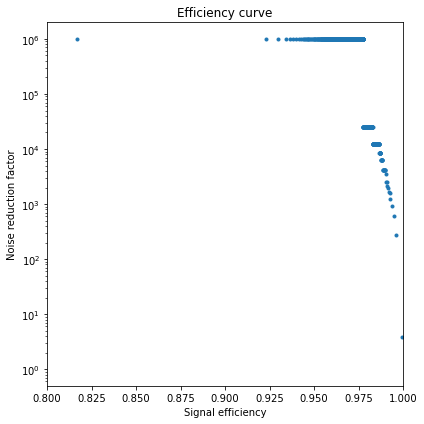

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(s, n,'.')
plt.xlim(0.8, 1)
#plt.ylim(0, 1.36)
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Noise reduction factor")
ax.semilogy(True)
ax.set_title("Efficiency curve")
fig.tight_layout()
#fig.savefig('plots/eff_curve_' + model_name + '_zoom.png')
plt.show()